In [2]:
# https://www.kaggle.com/datasets/fmendes/fmendesdat263xdemos?select=exercise.csv
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



### Data Collection

In [5]:
calories_df =pd.read_csv('calories.csv')

In [7]:
calories_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [8]:
exe_data = pd.read_csv('exercise.csv')

In [9]:
exe_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [10]:
exe_data['Calories']= calories_df.Calories

In [11]:
exe_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [12]:
exe_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [14]:
exe_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [15]:
sns.set()

C:\Users\hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

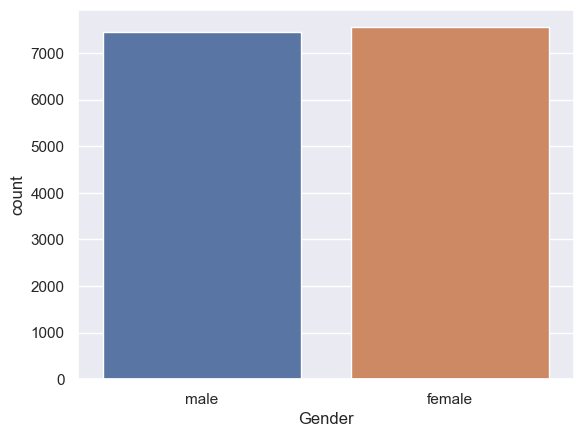

In [16]:
sns.countplot('Gender',data=exe_data)

In [19]:
exe_data['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

<AxesSubplot:>

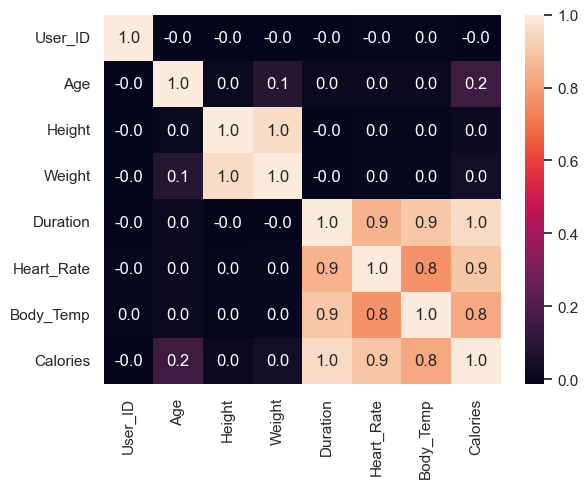

In [20]:
sns.heatmap(exe_data.corr(),annot=True,fmt='.1f')

Handleing catogrical data

In [21]:
exe_data.replace({'Gender':{'male':0,'female':1}},inplace=True)

Splliting Data

In [22]:
exe_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [23]:
 ################

In [25]:
X=exe_data.drop(columns=['User_ID','Height','Weight','Calories'],axis=1)

In [26]:
y = exe_data.Calories

In [30]:
X.shape,X.head()

((15000, 5),
    Gender  Age  Duration  Heart_Rate  Body_Temp
 0       0   68      29.0       105.0       40.8
 1       1   20      14.0        94.0       40.3
 2       0   69       5.0        88.0       38.7
 3       1   34      13.0       100.0       40.5
 4       1   27      10.0        81.0       39.8)

In [28]:
y.shape

(15000,)

In [31]:
## Train test model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=2)

In [32]:
model = XGBRegressor()

In [33]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [34]:
testpred = model.predict(X_test)

In [35]:
r2_score(y_test,testpred)

0.9964184171808459

In [36]:
mean_absolute_error(y_test,testpred)

2.5675442558129626

In [37]:
from sklearn.metrics import mean_absolute_percentage_error

In [38]:
mean_absolute_percentage_error(y_test,testpred)

0.03872443874914921

In [39]:
trainpred = model.predict(X_train)

In [40]:
r2_score(y_train,trainpred)

0.9982065911285973

In [42]:
mean_absolute_error(y_train,trainpred)

1.8626362210822602

In [43]:
mean_absolute_percentage_error(trainpred,y_train)

0.03173032487207937